In [3]:
%config InlineBackend.figure_format='retina'
%matplotlib inline
from analysis import model_generated, selection, add_variables, final_selection, phsp_generator
from k3pi_utilities import helpers
from matplotlib.backends.backend_pdf import PdfPages
from analysis.mass_fitting import get_yields, fit_parameters
from k3pi_config.modes import MODE, gcm
from k3pi_config import config
config.candidates_selection = True
config.optimised_selection = True
from analysis import efficiencies
from analysis import misid_selection
import numpy as np
import matplotlib.pyplot as plt
from k3pi_plotting import comparison
from k3pi_config.modes.D0ToKpipipi_RS import D0ToKpipipi_RS as mode_config
from k3pi_utilities import variables as vars
from k3pi_utilities import logger
from k3pi_utilities import PlotConfig

In [2]:
double_misid_pc = [
    PlotConfig(vars.m_SS, None, (100, 1810., 1920.)),
    PlotConfig(vars.dm_SS, None, (100, 140.5, 160.5)),
    PlotConfig(vars.m_OSH, None, (100, 1810., 1920.)),
    PlotConfig(vars.dm_OSH, None, (100, 140.5, 160.5)),
    PlotConfig(vars.m_OSL, None, (100, 1810., 1920.)),
    PlotConfig(vars.dm_OSL, None, (100, 140.5, 160.5)),
   ]

In [3]:
with MODE('MagBoth', 1516, 'RS'):
    rsdf_sel = final_selection.get_final_selection()
    rsmisid = add_variables.double_misid()
    rsdata = gcm().get_data([vars.dtf_dm(), vars.m(gcm().D0)])
    rsfwcut = misid_selection.misid_cut()
    sw = selection.delta_mass_signal_region()

INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/double_misidD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/misid_cutD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/delta_mass_signal_regionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5


In [4]:
np.sum(rsdf_sel&sw&rsfwcut)/np.sum(rsdf_sel&sw)

0.79574001462085464

In [39]:
with MODE('MagBoth', 1516, 'WS'):
    df_sel = final_selection.get_final_selection()
    misid = add_variables.double_misid()
    data = gcm().get_data([vars.dtf_dm(), vars.m(gcm().D0)])
    outfile = gcm().get_output_path('misid') + 'overview.pdf'
    with PdfPages(outfile) as pdf:
        for pc in double_misid_pc:
            fig, ax = plt.subplots(figsize=(10, 10))
            nbins, xmin, xmax = pc.binning
            ax.hist(misid[df_sel][pc.var], bins=nbins, range=(xmin, xmax))
            ax.set_xlabel(pc.xlabel)
            ax.set_xlim((xmin, xmax))
            pdf.savefig(fig)
            plt.close()

INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_WSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/double_misidD0ToKpipipi_WSMagBoth1516 from output/data/store.h5


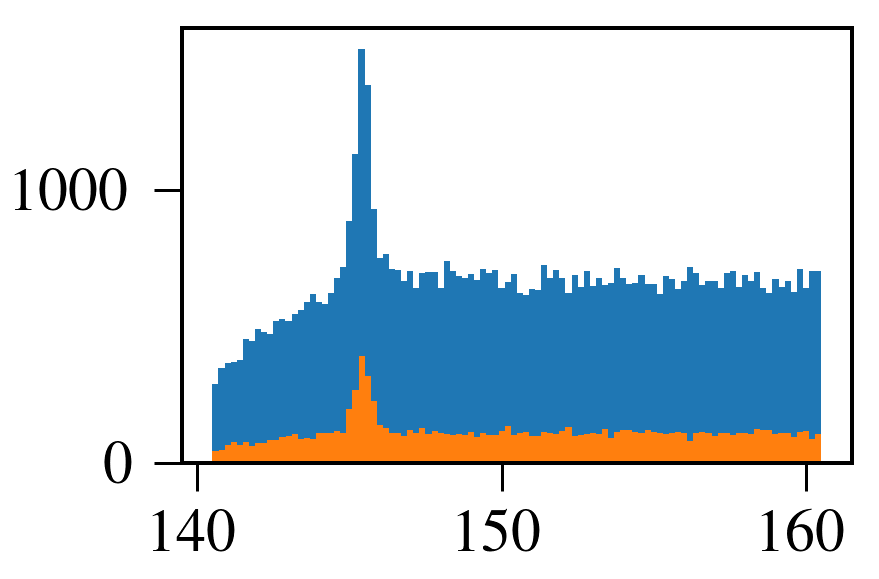

In [56]:
plt.hist(data.delta_m_dtf[df_sel &cutH&cutL], bins=100);
plt.hist(data.delta_m_dtf[df_sel &~(cutH&cutL)], bins=100);

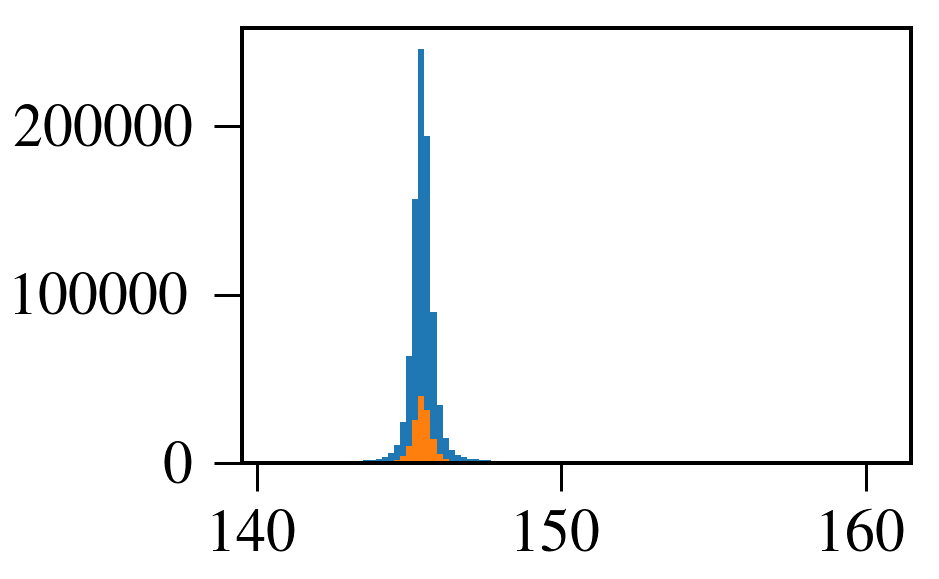

In [57]:
plt.hist(rsdata.delta_m_dtf[rsdf_sel &rscutH&rscutL], bins=100);
plt.hist(rsdata.delta_m_dtf[rsdf_sel &~(rscutH&rscutL)], bins=100);

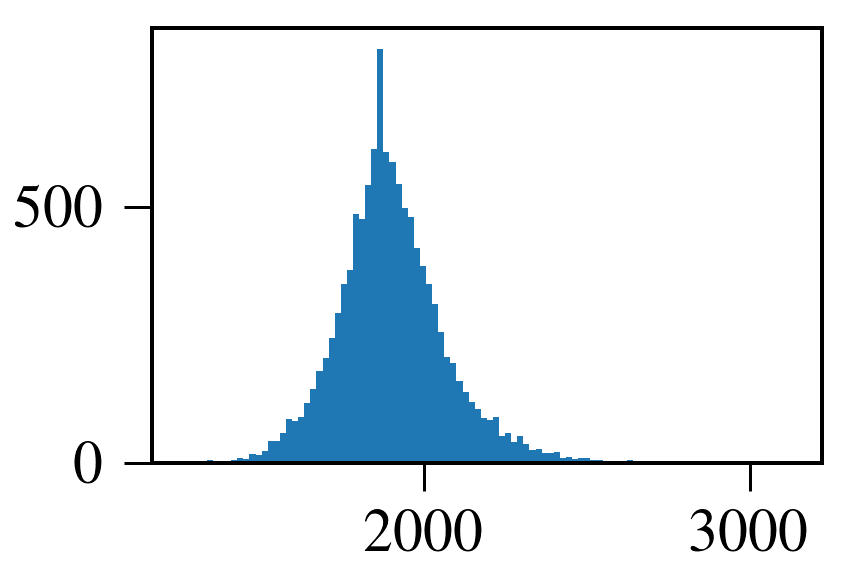

In [70]:
plt.hist(misid.m_OSH[df_sel&cut_sw], bins=100);

In [44]:
cutH = np.abs(misid.m_OSH-config.PDG_MASSES['D0']) > 20.
cutL = np.abs(misid.m_OSL-config.PDG_MASSES['D0']) > 20.

In [65]:
from

In [52]:
rscutH = np.abs(rsmisid.m_OSH-config.PDG_MASSES['D0']) > 20.
rscutL = np.abs(rsmisid.m_OSL-config.PDG_MASSES['D0']) > 20.

In [54]:
np.sum(rsdf_sel & rscutL)/np.sum(rsdf_sel)

0.95812690196264727

In [10]:
pc = PlotConfig(vars.dm, None, (100, 140.5, 150.5))
with MODE('MagBoth', 1516, 'RS'):
    df_sel = final_selection.get_final_selection()
    misid = add_variables.double_misid()
    data = gcm().get_data([vars.dtf_dm(), vars.dm()])
    outfile = gcm().get_output_path('selection') + 'DTF_effect.pdf'
    with PdfPages(outfile) as pdf:
        fig, ax = plt.subplots(figsize=(10, 10))
        comparison.plot_comparison(pc, data[df_sel][vars.dm()], data[df_sel][vars.dtf_dm()], 'No DTF', 'DTF',ax=ax)
        ax.set_xlabel(pc.xlabel)
        ax.set_ylabel('Arbitrary units')

        #ax.set_xlim((xmin, xmax))
        pdf.savefig(fig)
        plt.close()

INFO:buffer_load:Loading Cached/full_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/bdt_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/spearmint_spi_selectionD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_right_sign_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/randomly_remove_candidatesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/remove_clonesD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
INFO:buffer_load:Loading Cached/double_misidD0ToKpipipi_RSMagBoth1516 from output/data/store.h5
